In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [2]:
train = pd.read_csv("kkbox_data/sorted_train_v2.csv")
train = train.drop("Unnamed: 0", axis=1)

test = pd.read_csv("kkbox_data/sorted_test_v2.csv")
test = test.drop("Unnamed: 0", axis=1)

# There's a row with amt_per_day as infinity, we need to remove it.
train = train.drop(index=1600826)

# Remove columns that is deemed useless
cols = [c for c in train.columns if c not in ['is_churn', 'msno']]

features = pd.DataFrame(train[cols])
features_test = pd.DataFrame(test[cols])
target = pd.DataFrame(train['is_churn'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 101)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = sc.fit_transform(X_train)
features_test = sc.transform(X_test)

In [5]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(features, y_train)

/anaconda/envs/python_finance/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/python_finance/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
y_pred = gbm.predict(features_test)

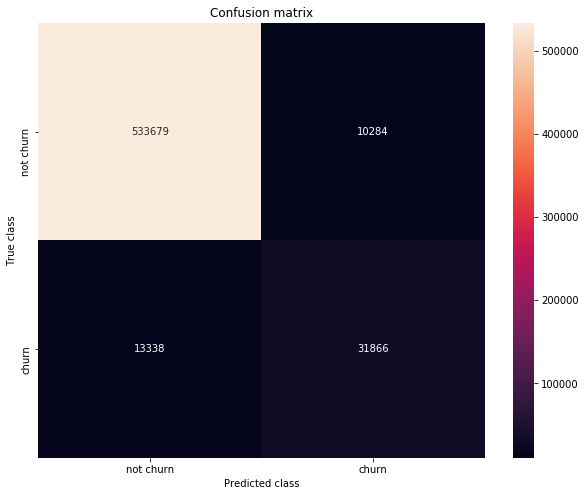

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, xticklabels=['not churn', 'churn'], yticklabels=['not churn', 'churn'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

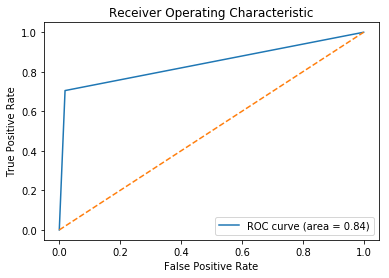

In [9]:
from sklearn.metrics import roc_curve, auc  
 
(false_positive_rate, true_positive_rate, threshold) = roc_curve(y_test, y_pred)  
roc_auc = auc(false_positive_rate, true_positive_rate)  
 
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], ls="--")  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.legend(loc="lower right")  
plt.show()  

# To Apply for Kaggle

In [ ]:
features_test = pd.DataFrame(test[cols])

features_test = sc.transform(features_test)

In [ ]:
predictions = gbm.predict_proba(features_test)

In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
predictions[1].tail()

In [ ]:
submission = pd.DataFrame({ 'msno': test['msno'],
                            'is_churn': predictions[1] })
submission.to_csv("submission_xgboost.csv", index=False)